In [63]:
# importing the necesary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv("/Users/pearly/Documents/Gcar/gcar_data_semiclean - gcar_data.csv")

In [16]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140.0,190.0,Automatic,Hybrid,5.4,124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49.0,67.0,Manual,Petrol,4.6,106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125.0,170.0,Automatic,Electric,0.0,0,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114.0,155.0,Automatic,Petrol,7.5,175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110.0,150.0,Manual,Petrol,5.9,150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99946 entries, 0 to 99945
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     99946 non-null  object 
 1   model                     99946 non-null  object 
 2   color                     99870 non-null  object 
 3   registration_date         99946 non-null  object 
 4   year                      99946 non-null  int64  
 5   price_in_euro             99946 non-null  int64  
 6   power_kw                  99874 non-null  float64
 7   power_ps                  99874 non-null  float64
 8   transmission_type         99946 non-null  object 
 9   fuel_type                 99946 non-null  object 
 10  fuel_consumption_l_100km  91462 non-null  float64
 11  fuel_consumption_g_km     82047 non-null  object 
 12  mileage_in_km             99899 non-null  float64
 13  offer_description         99946 non-null  object 
dtypes: flo

In [18]:
df.shape

(99946, 14)

In [19]:
df.isna().sum()

brand                           0
model                           0
color                          76
registration_date               0
year                            0
price_in_euro                   0
power_kw                       72
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km     8484
fuel_consumption_g_km       17899
mileage_in_km                  47
offer_description               0
dtype: int64

In [20]:
df.fuel_type.value_counts()

Petrol           54290
Diesel           37593
Hybrid            4291
Electric          2467
LPG                930
Diesel Hybrid      137
Other               84
CNG                 61
Unknown             45
Hydrogen            39
Ethanol              9
Name: fuel_type, dtype: int64

In [21]:
#  dropping the rows with 'Unknown' and 'Other' values in the 'fuel_type' column
df = df[(df['fuel_type'] != 'Unknown') & (df['fuel_type'] != 'Other')]
df['fuel_type'].value_counts()

Petrol           54290
Diesel           37593
Hybrid            4291
Electric          2467
LPG                930
Diesel Hybrid      137
CNG                 61
Hydrogen            39
Ethanol              9
Name: fuel_type, dtype: int64

In [22]:
df.brand.value_counts()

audi            21134
bmw             19779
ford            18753
hyundai          6979
kia              5720
fiat             5028
citroen          4068
dacia            3363
land-rover       3071
mazda            2182
jeep             1743
alfa-romeo       1437
jaguar           1398
honda             785
maserati          696
dodge             665
ferrari           585
bentley           539
lamborghini       360
aston-martin      277
isuzu             205
daihatsu          203
chevrolet         191
lada              190
cadillac          157
infiniti          112
lancia            105
daewoo             60
chrysler           32
Name: brand, dtype: int64

In [23]:
# brand_count = df.brand.value_counts()

# def cat_brand(brand_name):
   # if brand_count[brand_name] < 1000:
      #  return 'Less than 1000'
   # else:
     #   return brand_name

#df.brand = df.brand.apply(cat_brand)

# df[df['brand'] == 'Less than 1000'].shape[0]

In [24]:
df['year'].value_counts()

2019    12047
2018     9985
2023     8660
2017     7861
2022     7547
2020     7393
2016     6759
2021     5831
2015     5338
2014     4525
2013     3560
2012     3308
2011     3085
2009     2417
2010     2350
2008     1785
2007     1463
2006     1442
2005     1122
2004      924
2003      674
2002      466
2001      385
2000      296
1999      246
1998      167
1997      114
1996       42
1995       25
Name: year, dtype: int64

In [25]:
mode_valuel_100km = df['fuel_consumption_l_100km'].mode()[0]
df['fuel_consumption_l_100km'].fillna(mode_valuel_100km, inplace=True)

In [26]:
mode_value_g_km = df['fuel_consumption_g_km'].mode()[0]
df['fuel_consumption_g_km'].fillna(mode_value_g_km, inplace=True)

In [27]:
df.isnull().sum()

brand                        0
model                        0
color                       76
registration_date            0
year                         0
price_in_euro                0
power_kw                    63
power_ps                    63
transmission_type            0
fuel_type                    0
fuel_consumption_l_100km     0
fuel_consumption_g_km        0
mileage_in_km               47
offer_description            0
dtype: int64

In [28]:
df.dropna(inplace=True)

Data Visualisation and EDA

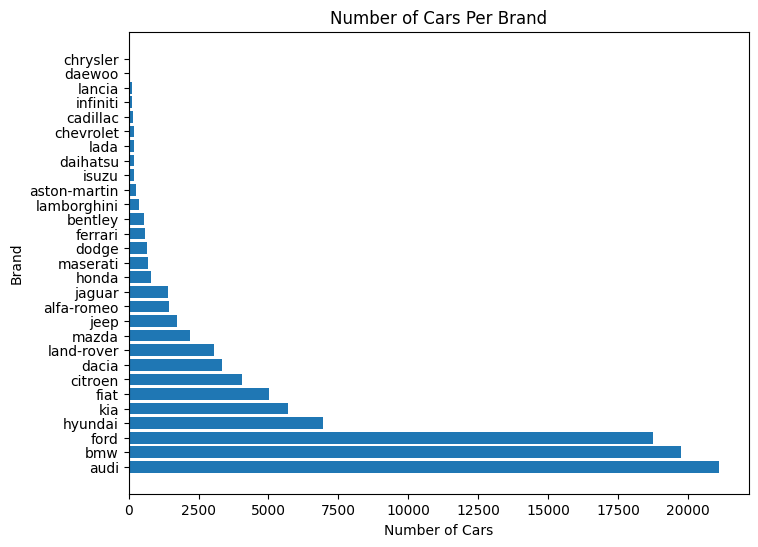

In [29]:
plt.figure(figsize=(8, 6))

brand_counts = df['brand'].value_counts()

plot1 = plt.barh(brand_counts.index, brand_counts.values)

plt.xlabel('Number of Cars')
plt.ylabel('Brand')
plt.title('Number of Cars Per Brand')
plt.show()

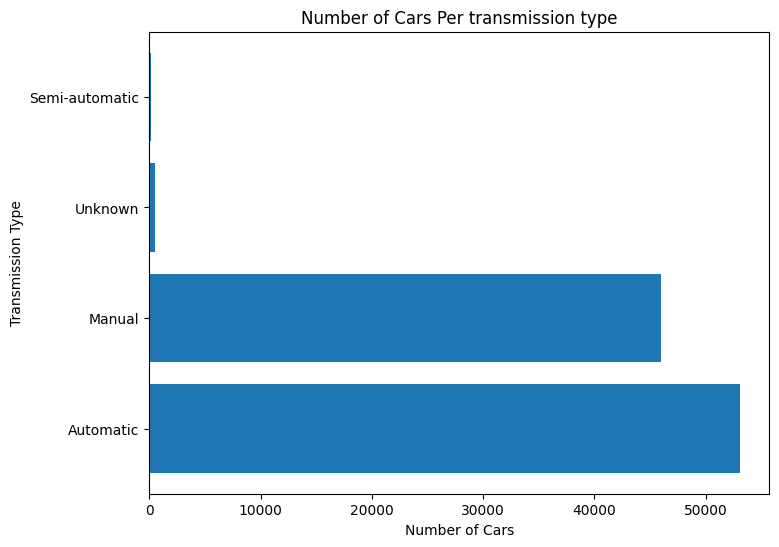

In [30]:
plt.figure(figsize=(8, 6))

transmission_counts = df['transmission_type'].value_counts()

plot2 = plt.barh(transmission_counts.index, transmission_counts.values)

plt.xlabel('Number of Cars')
plt.ylabel('Transmission Type')
plt.title('Number of Cars Per transmission type')
plt.show()

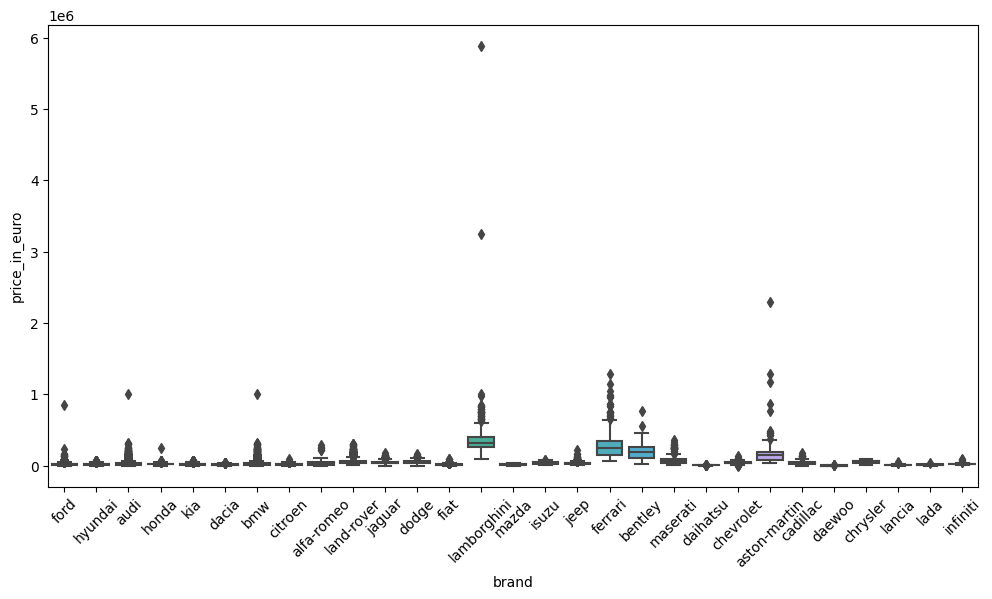

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price_in_euro', data=df)
plt.xticks(rotation=45)
plt.show()

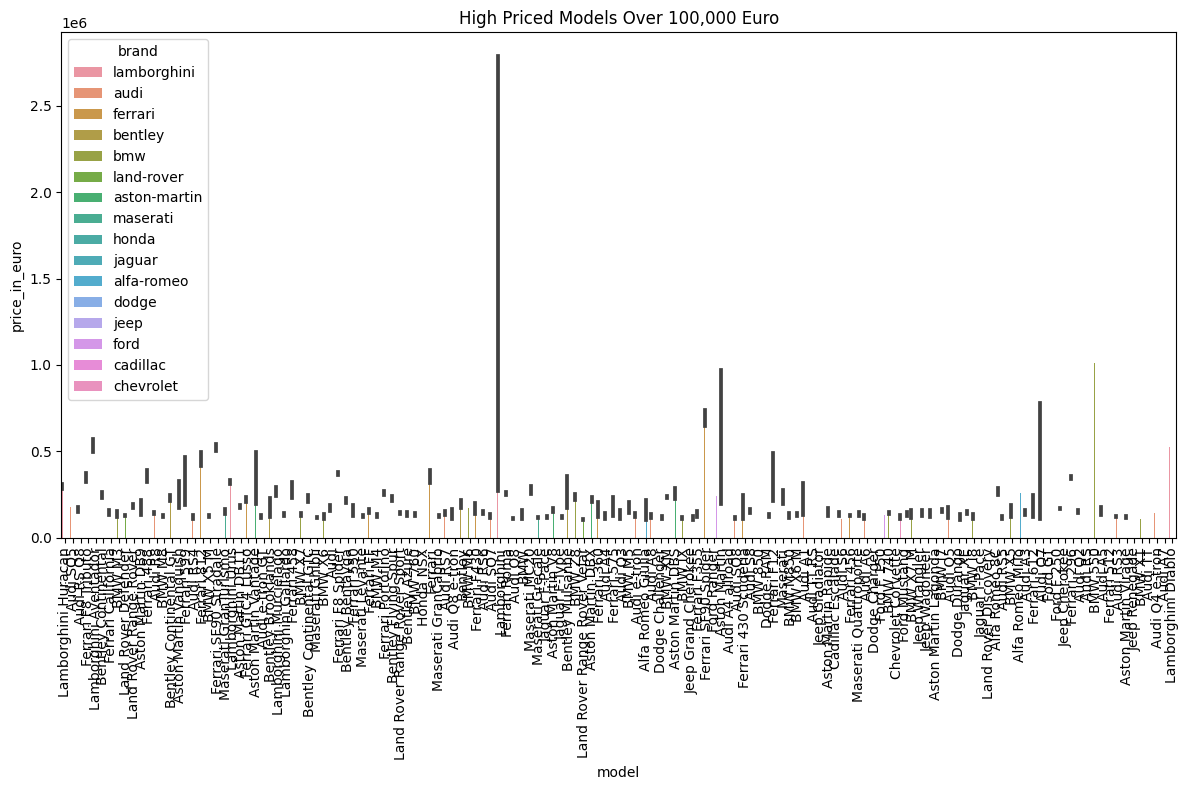

(2593, 14)

In [32]:
# Filter models where the price is above 100,000 Euro
high_priced_models = df[df['price_in_euro'] > 100000]

# Bar plot for high-priced models
plt.figure(figsize=(12, 8))
sns.barplot(x='model', y='price_in_euro', hue='brand', data=high_priced_models)
plt.title('High Priced Models Over 100,000 Euro')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
high_priced_models.shape

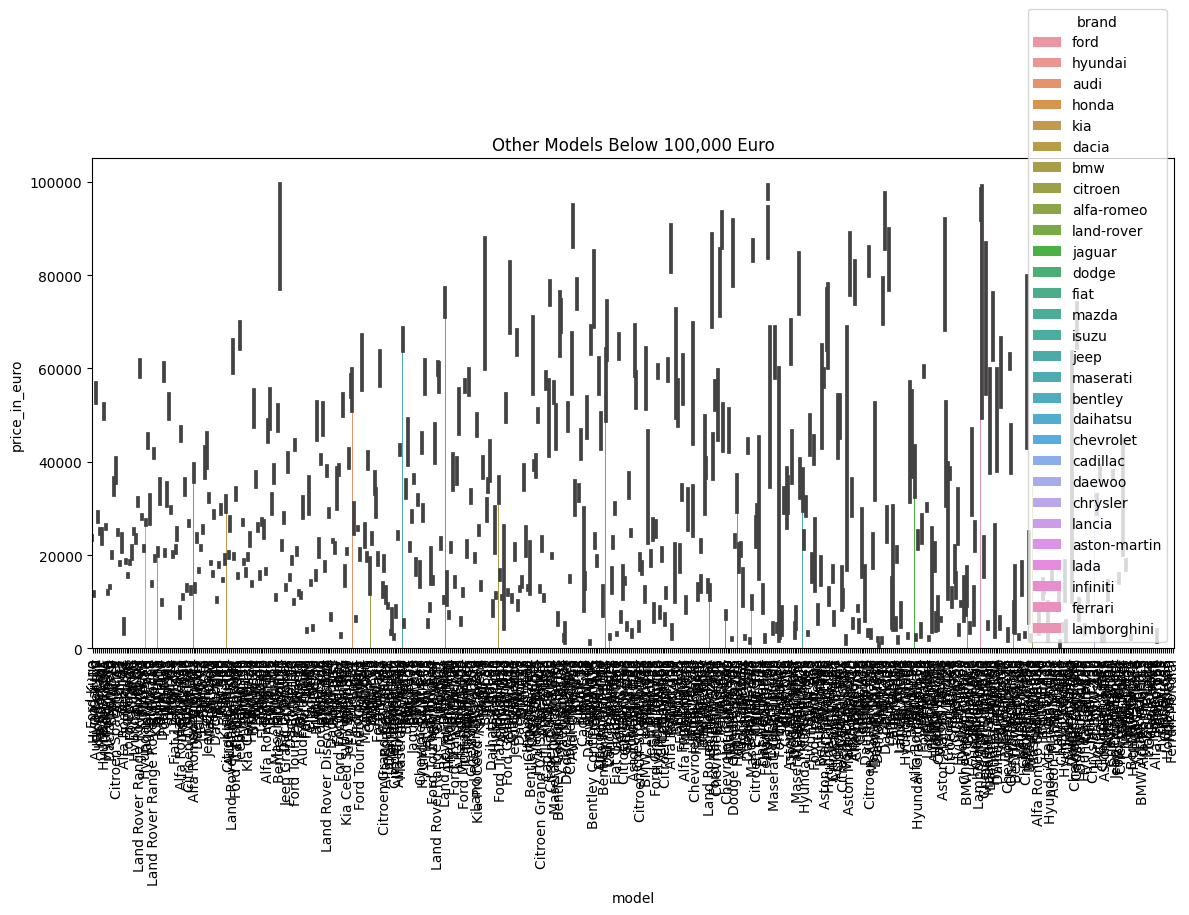

(97031, 14)

In [33]:
# Filter models where the price is below 100,000 Euro
other_models = df[df['price_in_euro'] < 100000]

# Bar plot for high-priced models
plt.figure(figsize=(12, 8))
sns.barplot(x='model', y='price_in_euro', hue='brand', data=other_models)
plt.title('Other Models Below 100,000 Euro')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
other_models.shape

In [34]:
luxury_cars_df = df[df['price_in_euro'] > 100000]
regular_cars_df = df[df['price_in_euro'] <= 100000]

luxury_cars_df.to_csv('luxury_cars.csv', index=False)
regular_cars_df.to_csv('regular_cars.csv', index=False)

In [35]:
filtered_df = regular_cars_df[regular_cars_df['fuel_consumption_l_100km'] > 0]
print(filtered_df.head())


     brand         model  color registration_date  year  price_in_euro  \
0     ford     Ford Kuga  black           05/2023  2023          38490   
1  hyundai   Hyundai i10  black           09/2018  2018          11555   
3    honda    Honda CR-V    red           07/2018  2018          24490   
4      kia  Kia Sportage  black           02/2023  2023          34990   
5    honda   Honda Civic  black           09/2009  2009           5800   

   power_kw  power_ps transmission_type fuel_type  fuel_consumption_l_100km  \
0     140.0     190.0         Automatic    Hybrid                       5.4   
1      49.0      67.0            Manual    Petrol                       4.6   
3     114.0     155.0         Automatic    Petrol                       7.5   
4     110.0     150.0            Manual    Petrol                       5.9   
5     103.0     140.0            Manual    Petrol                       6.7   

  fuel_consumption_g_km  mileage_in_km  \
0              124 g/km          100.0

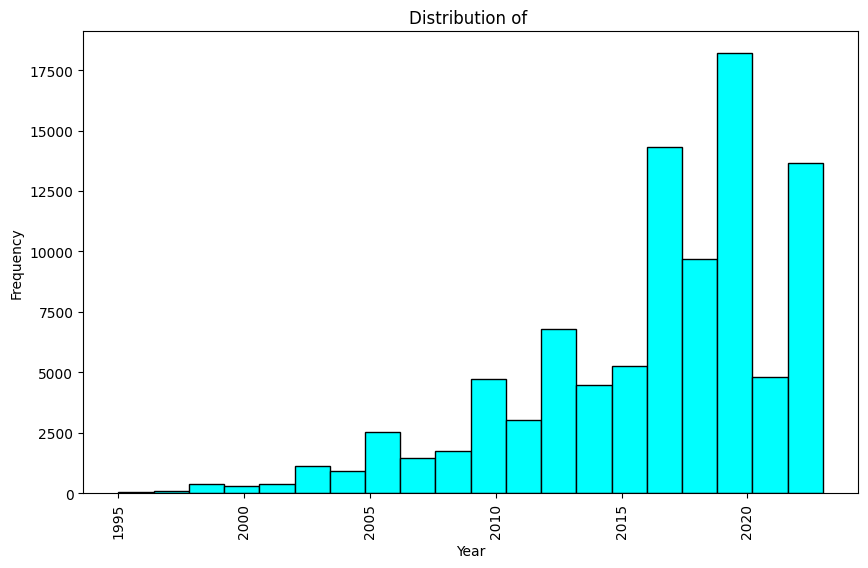

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['year'], bins=20, color='cyan', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of ')
plt.xticks(rotation=90)
plt.show()

In [37]:
filtered_df['fuel_consumption_l_100km'].describe()

count    93915.000000
mean         6.718844
std         17.939428
min          0.400000
25%          5.100000
50%          5.700000
75%          6.800000
max        739.000000
Name: fuel_consumption_l_100km, dtype: float64

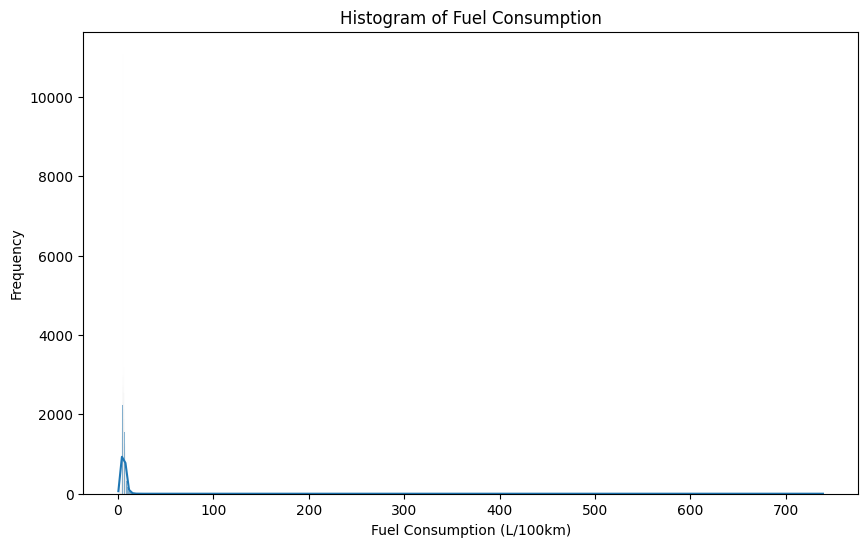

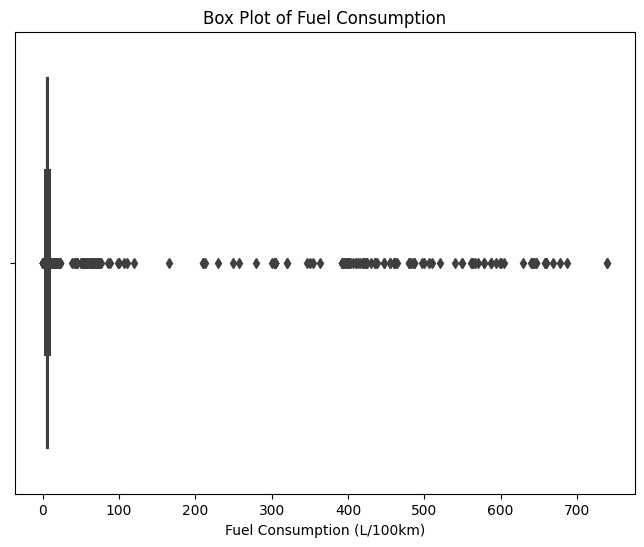

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['fuel_consumption_l_100km'], kde=True)
plt.title('Histogram of Fuel Consumption')
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['fuel_consumption_l_100km'])
plt.title('Box Plot of Fuel Consumption')
plt.xlabel('Fuel Consumption (L/100km)')
plt.show()

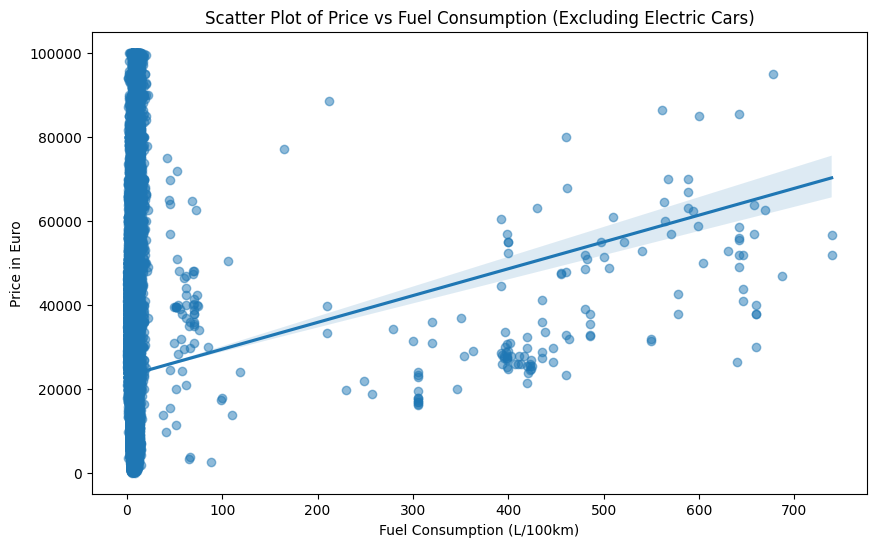

The Pearson correlation coefficient between fuel consumption and price is: 0.07


In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(x='fuel_consumption_l_100km', y='price_in_euro', data=filtered_df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Price vs Fuel Consumption (Excluding Electric Cars)')
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Price in Euro')
plt.show()

correlation = filtered_df['fuel_consumption_l_100km'].corr(filtered_df['price_in_euro'])
print(f"The Pearson correlation coefficient between fuel consumption and price is: {correlation:.2f}")

In [40]:
def clean_data(value):
    if isinstance(value, str):
        # Use regular expression to remove non-numeric characters
        value = re.sub(r'[^0-9.]', '', value)
    return value

# Apply the cleaning function to the column
filtered_df['fuel_consumption_g_km'] = filtered_df['fuel_consumption_g_km'].apply(clean_data)

# Convert the cleaned column to float
filtered_df['fuel_consumption_g_km'] = filtered_df['fuel_consumption_g_km'].astype(float)

# Check the new data type of the 'fuel_consumption_g_km' column
print(filtered_df['fuel_consumption_g_km'].dtype)

float64


/var/folders/qp/btmbpk_j68xgn9bg3c358zdh0000gn/T/ipykernel_4295/3955579060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['fuel_consumption_g_km'] = filtered_df['fuel_consumption_g_km'].apply(clean_data)
/var/folders/qp/btmbpk_j68xgn9bg3c358zdh0000gn/T/ipykernel_4295/3955579060.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['fuel_consumption_g_km'] = filtered_df['fuel_consumption_g_km'].astype(float)


In [41]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93915 entries, 0 to 99945
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     93915 non-null  object 
 1   model                     93915 non-null  object 
 2   color                     93915 non-null  object 
 3   registration_date         93915 non-null  object 
 4   year                      93915 non-null  int64  
 5   price_in_euro             93915 non-null  int64  
 6   power_kw                  93915 non-null  float64
 7   power_ps                  93915 non-null  float64
 8   transmission_type         93915 non-null  object 
 9   fuel_type                 93915 non-null  object 
 10  fuel_consumption_l_100km  93915 non-null  float64
 11  fuel_consumption_g_km     93915 non-null  float64
 12  mileage_in_km             93915 non-null  float64
 13  offer_description         93915 non-null  object 
dtypes: flo

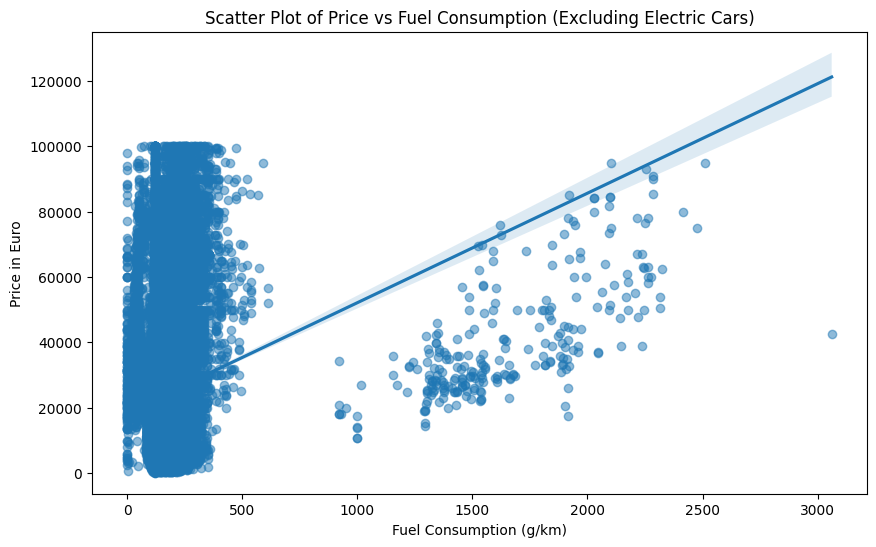

The Pearson correlation coefficient between fuel consumption and price is: 0.07


In [42]:
plt.figure(figsize=(10, 6))
sns.regplot(x='fuel_consumption_g_km', y='price_in_euro', data=filtered_df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Price vs Fuel Consumption (Excluding Electric Cars)')
plt.xlabel('Fuel Consumption (g/km)')
plt.ylabel('Price in Euro')
plt.show()

correlation = filtered_df['fuel_consumption_l_100km'].corr(filtered_df['price_in_euro'])
print(f"The Pearson correlation coefficient between fuel consumption and price is: {correlation:.2f}")

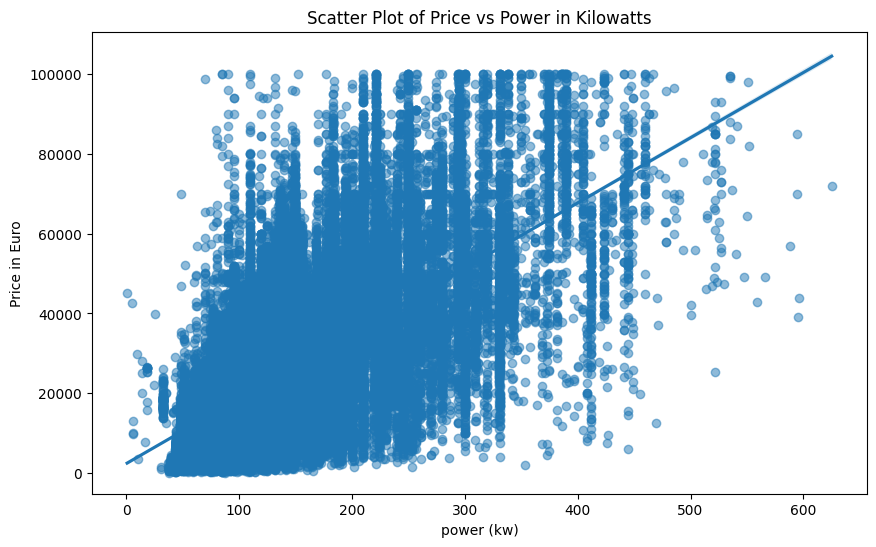

The Pearson correlation coefficient between power in Kw and price is: 0.66


In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(x='power_kw', y='price_in_euro', data=regular_cars_df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Price vs Power in Kilowatts')
plt.xlabel('power (kw)')
plt.ylabel('Price in Euro')
plt.show()

correlation = regular_cars_df['power_kw'].corr(regular_cars_df['price_in_euro'])
print(f"The Pearson correlation coefficient between power in Kw and price is: {correlation:.2f}")

/var/folders/qp/btmbpk_j68xgn9bg3c358zdh0000gn/T/ipykernel_4295/2783285337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_cars_df['registration_date'] = pd.to_datetime(regular_cars_df['registration_date'])


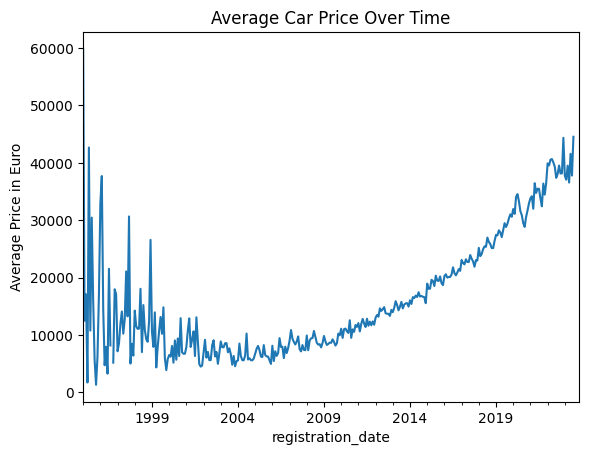

In [44]:
regular_cars_df['registration_date'] = pd.to_datetime(regular_cars_df['registration_date'])
regular_cars_df.set_index('registration_date', inplace=True)
regular_cars_df['price_in_euro'].resample('M').mean().plot()
plt.title('Average Car Price Over Time')
plt.ylabel('Average Price in Euro')
plt.show()

In [64]:
for col in regular_cars_df.select_dtypes(object).columns:
    regular_cars_df[col] = LabelEncoder().fit_transform(regular_cars_df[col])
    
regular_cars_df.info()

/var/folders/qp/btmbpk_j68xgn9bg3c358zdh0000gn/T/ipykernel_4295/2382617729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_cars_df[col] = LabelEncoder().fit_transform(regular_cars_df[col])
/var/folders/qp/btmbpk_j68xgn9bg3c358zdh0000gn/T/ipykernel_4295/2382617729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_cars_df[col] = LabelEncoder().fit_transform(regular_cars_df[col])
/var/folders/qp/btmbpk_j68xgn9bg3c358zdh0000gn/T/ipykernel_4295/2382617729.py:2: SettingWithCopyWarning: 
A va

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97039 entries, 2023-05-01 to 2018-05-01
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     97039 non-null  int64  
 1   model                     97039 non-null  int64  
 2   color                     97039 non-null  int64  
 3   year                      97039 non-null  int64  
 4   price_in_euro             97039 non-null  int64  
 5   power_kw                  97039 non-null  float64
 6   power_ps                  97039 non-null  float64
 7   transmission_type         97039 non-null  int64  
 8   fuel_type                 97039 non-null  int64  
 9   fuel_consumption_l_100km  97039 non-null  float64
 10  fuel_consumption_g_km     97039 non-null  int64  
 11  mileage_in_km             97039 non-null  float64
 12  offer_description         97039 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 10.4 M

/var/folders/qp/btmbpk_j68xgn9bg3c358zdh0000gn/T/ipykernel_4295/2382617729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_cars_df[col] = LabelEncoder().fit_transform(regular_cars_df[col])


In [65]:
X = regular_cars_df[['year', 'power_kw', 'fuel_consumption_l_100km', 'fuel_type', 'transmission_type', 'mileage_in_km', 'brand']]
y = regular_cars_df['price_in_euro']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [67]:


models = {
    'catBoost': CatBoostRegressor(verbose = 0),
    'xgb': XGBRFRegressor(),
    'lr': LinearRegression(),
    'DTree': DecisionTreeRegressor(),
    'adaBoost': AdaBoostRegressor(),
    'randomForest': RandomForestRegressor(),
    'gBoost': GradientBoostingRegressor()
}

for label, model in models.items():
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)

    print(label, "R-squared score:", np.round(r2 * 100, 2), "%")
    

catBoost R-squared score: 89.1 %
xgb R-squared score: 80.57 %
lr R-squared score: 74.56 %
DTree R-squared score: 73.81 %
adaBoost R-squared score: 66.72 %
randomForest R-squared score: 86.8 %
gBoost R-squared score: 86.4 %


The catboost model has the highest R squared value.

In [68]:
model = CatBoostRegressor(verbose = 0)

model.fit(x_train, y_train)
 
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared score:", np.round(r2 * 100, 2), "%")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R-squared score: 89.1 %
MSE: 30972632.219953783
MAE: 3252.2069418561045


In [80]:
selected_columns = regular_cars_df[['year', 'power_kw', 'fuel_consumption_l_100km', 'fuel_type', 'transmission_type', 'mileage_in_km', 'brand']]

pd.DataFrame({
        'feature': selected_columns.columns,
        'importance': model.feature_importances_,
    }).sort_values('importance', ascending=False)

,feature,importance
1,power_kw,40.790935
0,year,24.108710
5,mileage_in_km,11.865259
6,brand,9.427602
3,fuel_type,5.500835
2,fuel_consumption_l_100km,4.449948
4,transmission_type,3.856710


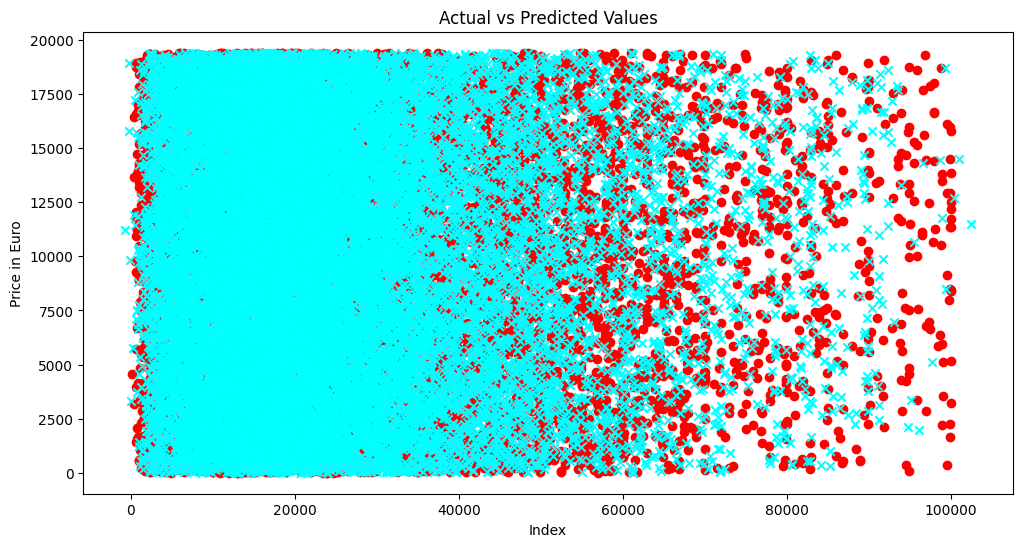

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x = y_test, y = list(range(len(x_test))), color='red', marker='o')
ax.scatter(x = y_pred, y = list(range(len(x_test))), color='cyan', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Price in Euro')
plt.show()